In [1]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the dataset from the diretory

dataset = pd.read_csv('../data/diabetes.csv')

In [3]:
# Storing the data columns

dataset_columns = dataset.columns

# Columns description
**Pregnancies**: Number of times pregnant

**Plasma glucose**: concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function (liklihood of diabetes based on family history)

**Age**: Age (years)

**Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [4]:
# Seeing the head of dataset

dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Understanding the basic statistical structure of data

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Figure size 3600x3600 with 0 Axes>

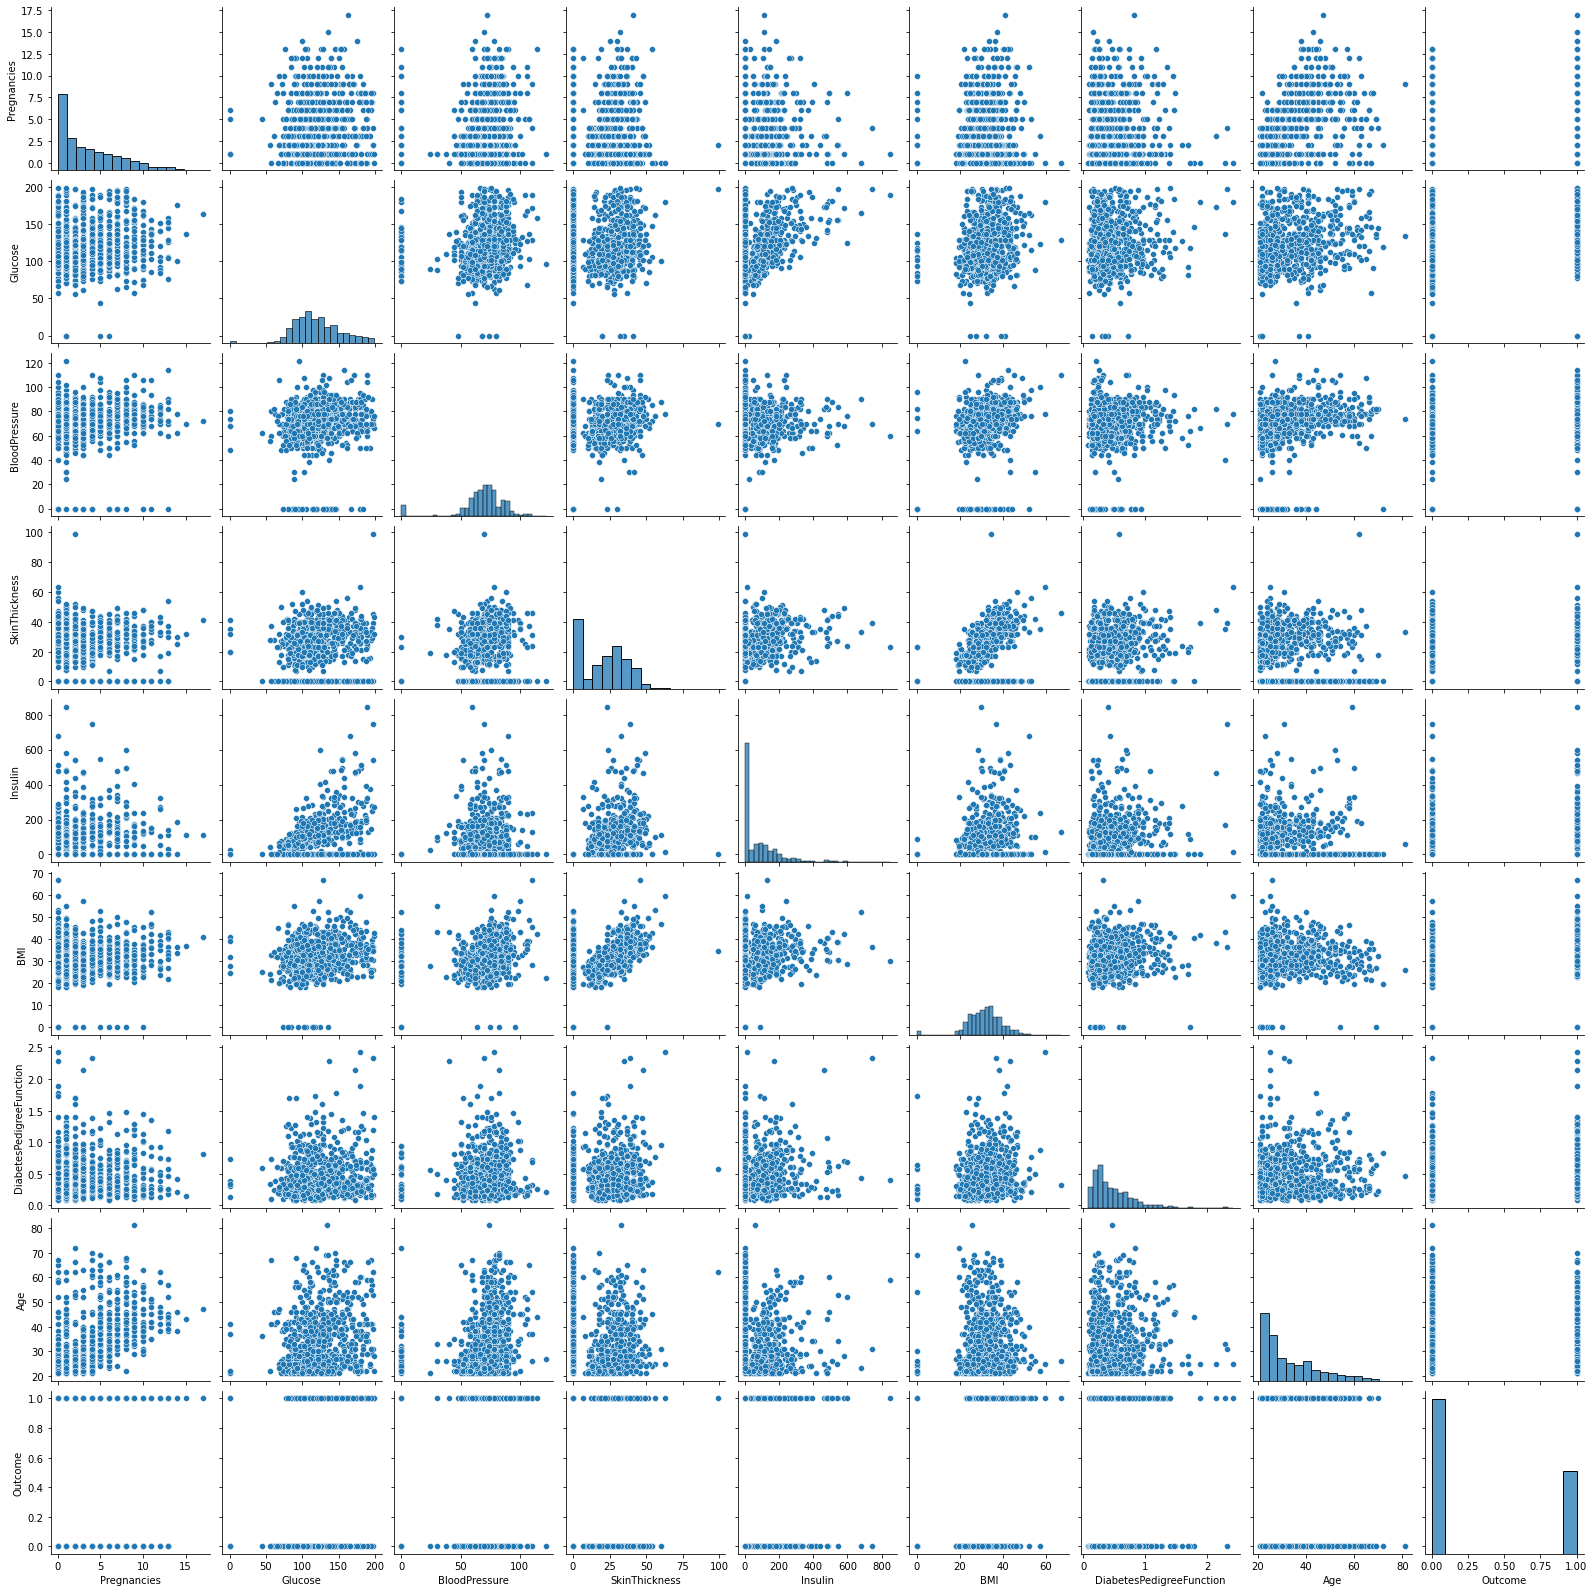

In [6]:
# Pair plotting for feature of dataset

plt.figure(figsize = (50,50))
sns.pairplot(dataset)

#### Using the describe function and graph above for given dataset, the initial findings are:
1. Values differ a lot and we need to normalise them as we will be using distance based algorithms
2. There are few columns with minimum value as 0 which does'nt make sense (eg: glucose, BP, etc.)
3. We can take pregnancies to be 0 whenever it is 0 as it is a possible scenario.

In [7]:
# Correlation among the columns before any preprocessing

dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
# Replacing values (when 0) of columns below with their mean to remove any non value datapoint

columns_replace_values_with_mean = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
dataset[columns_replace_values_with_mean] = dataset[columns_replace_values_with_mean].mask(dataset[columns_replace_values_with_mean]==0).fillna(dataset[columns_replace_values_with_mean].mean())

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.000000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.000000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.000000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.000000,32.00000,99.00
Insulin,768.0,118.660163,93.080358,14.000,79.799479,79.799479,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.000000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.000000,1.00000,1.00


In [10]:
# Normalising values (using Z-score and min-max) as we will be using a distance based algorithms (i.e. KNN)

dataset_z_score = dataset.copy()
dataset_min_max = dataset.copy()
columns_to_normalise = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                        'DiabetesPedigreeFunction', 'Age']
dataset_z_score[columns_to_normalise] = (dataset_z_score[columns_to_normalise]-dataset_z_score[columns_to_normalise].mean())/dataset_z_score[columns_to_normalise].std()

dataset_min_max[columns_to_normalise] = (dataset_min_max[columns_to_normalise]-dataset_min_max[columns_to_normalise].min())/(dataset_min_max[columns_to_normalise].max()-dataset_min_max[columns_to_normalise].min())

<Figure size 3600x3600 with 0 Axes>

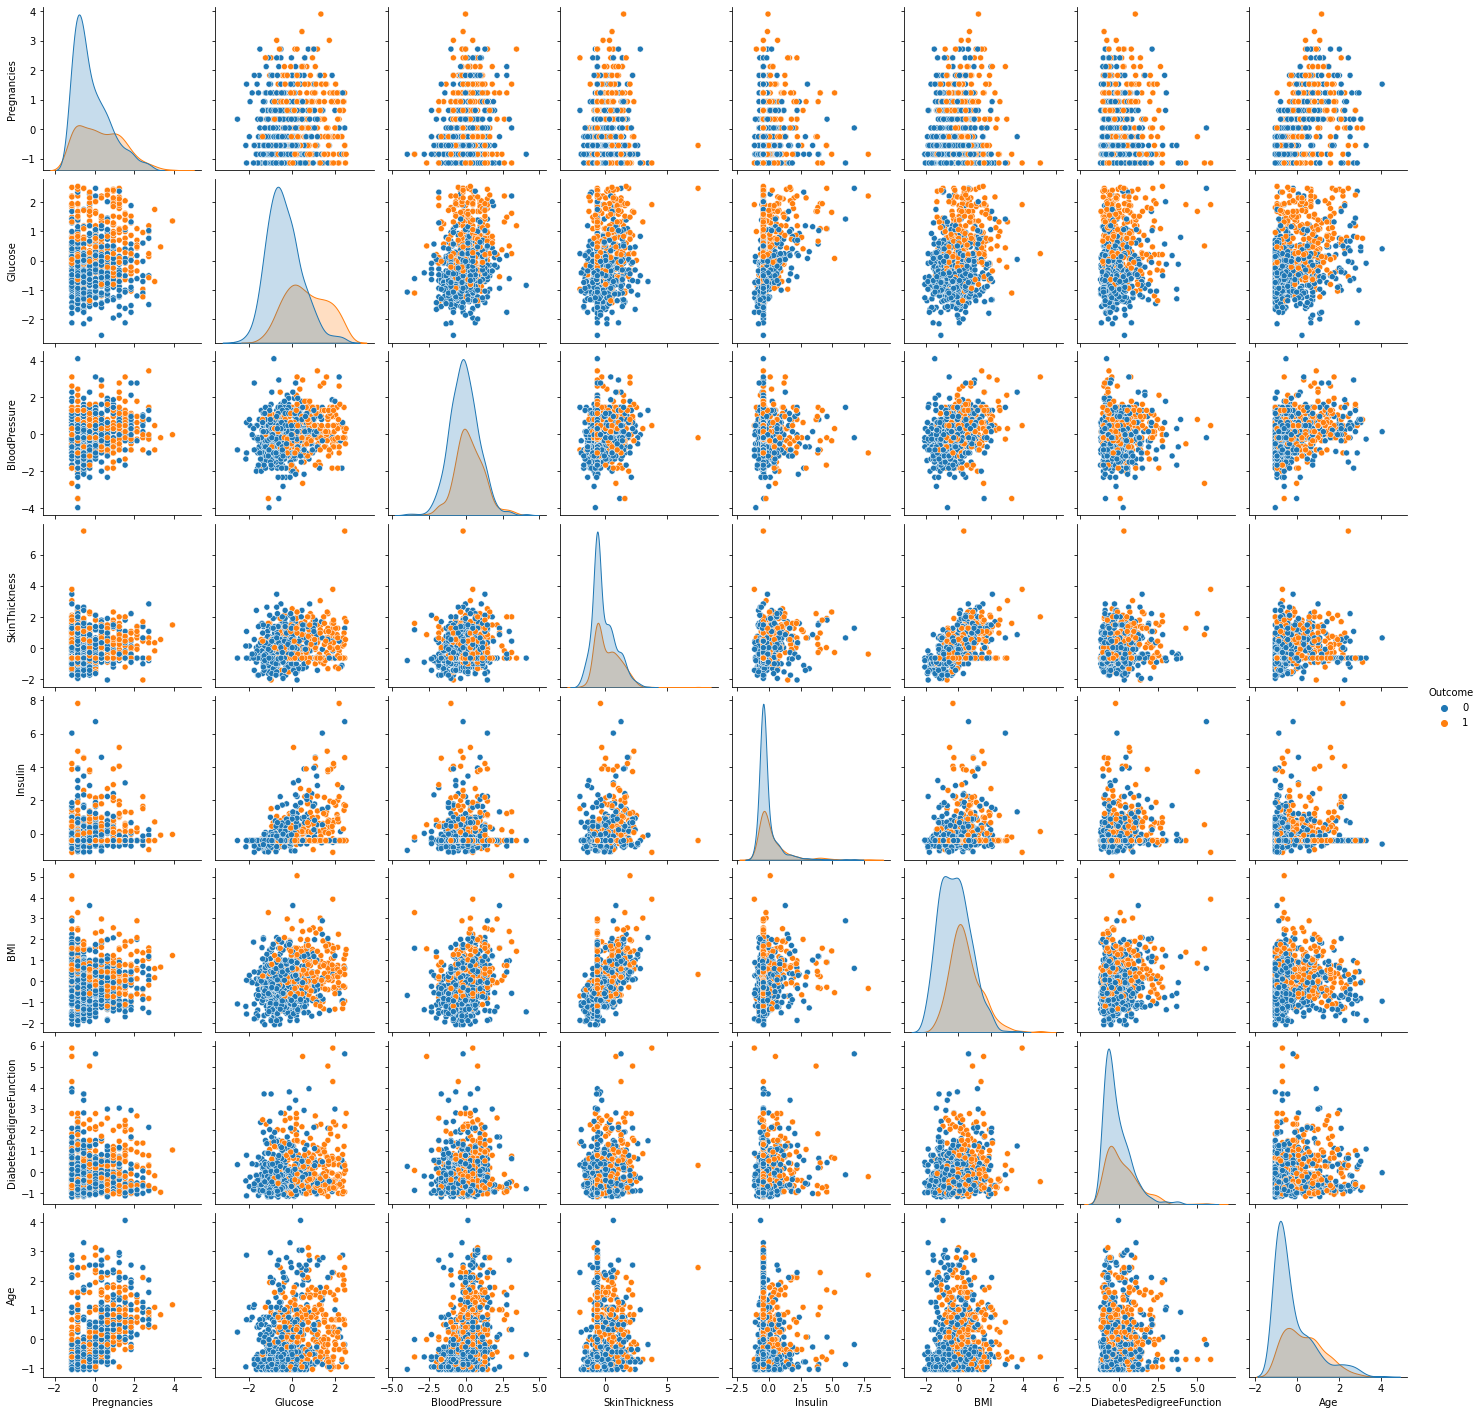

In [11]:
# Pair plotting for feature of dataset with hue as Outcome understanding the dependency and contribution of each feature after normalisation

plt.figure(figsize = (50,50))
sns.pairplot(dataset_z_score, hue = 'Outcome')

<AxesSubplot:>

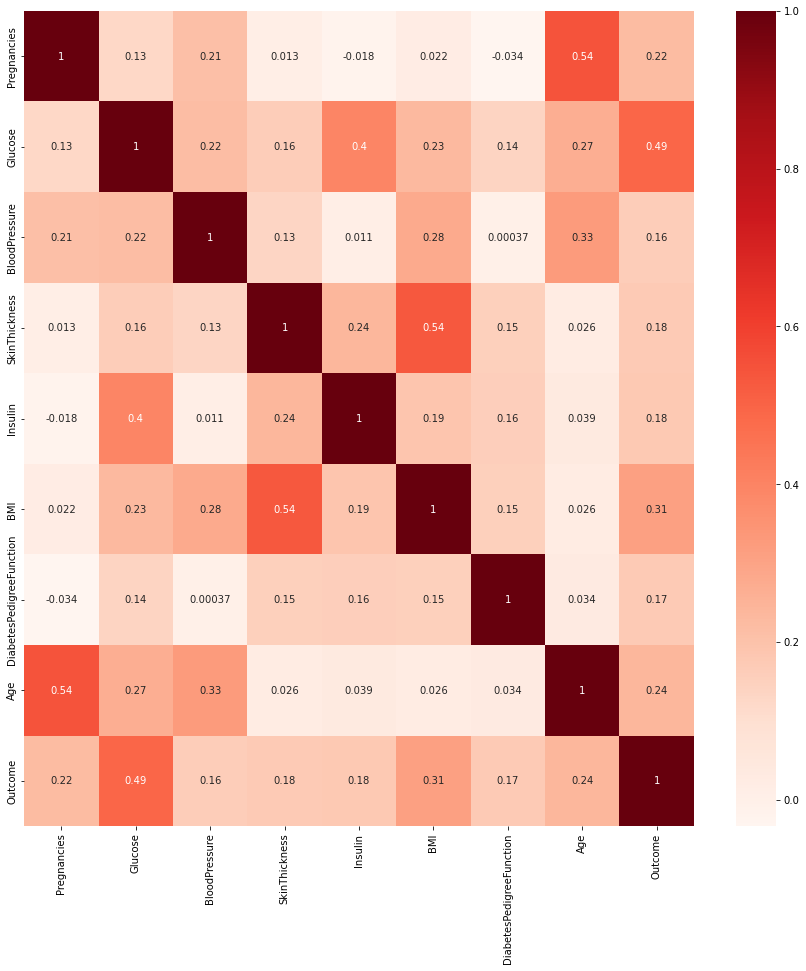

In [12]:
# Heat map of features after normalisation
plt.figure(figsize = (15,15))
sns.heatmap(dataset_z_score.corr(), annot=True, cmap ="Reds")

In [13]:
dataset_z_score

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.864712,-0.021031,0.871489,-0.417496,0.167147,0.468187,1.425067,1
1,-0.844335,-1.205204,-0.516246,0.248516,-0.417496,-0.850980,-0.364823,-0.190548,0
2,1.233077,2.014666,-0.681318,-0.630243,-0.417496,-1.330954,0.604004,-0.105515,1
3,-0.844335,-1.073781,-0.516246,-0.374456,-0.264934,-0.632810,-0.920163,-1.040871,0
4,-1.141108,0.503298,-2.662181,0.871489,0.530078,1.548890,5.481337,-0.020483,1
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.679511,0.309113,2.221263,0.658999,0.065334,-0.908090,2.530487,0
764,-0.547562,0.010461,-0.186103,0.040859,-0.417496,0.632576,-0.398023,-0.530677,0
765,0.342757,-0.022395,-0.021031,-0.374456,-0.071553,-0.909159,-0.684747,-0.275580,0
766,-0.844335,0.141884,-1.011462,-0.630243,-0.417496,-0.341917,-0.370859,1.169970,1


In [14]:
dataset_min_max

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000,0
764,0.117647,0.503226,0.469388,0.217391,0.079086,0.380368,0.111870,0.100000,0
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000,0
766,0.058824,0.529032,0.367347,0.147135,0.079086,0.243354,0.115713,0.433333,1


In [15]:
# saving the processed data as csv to take input for ML algorithm input

dataset_z_score.to_csv("../data/diabetes_z_score.csv", index=False)
dataset_min_max.to_csv("../data/diabetes_min_max.csv", index=False)

## Conclusion

> The dataset generated here is getting used in the KNN implementaion (Separate notebook) where it is used

> We will look at two different types of noramalised dataset and 3 different distance metrics (Manhattan, Euclidean, Cosine)